# Data Visualization Project - Exploration


### Dataset: Loan Data from Prosper

About the dataset: this data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### Import the libaries and read the data

In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests


%matplotlib inline

In [2]:
# read the original data file
df_original = pd.read_csv('prosperLoanData.csv')
df_original.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Explore the data

In [3]:
# numbers of rows and columns
df_original.shape

(113937, 81)

There are 113937 tows and 81 columns in the data.

In [4]:
# Explore the information of each columns
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# viewing all the names of the columns
df_original.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Need to simplify the numbers of the column and only include the columns of interest.

In [6]:
# Creating a new columns of all the vairables of interest that could be potential factors for interpreting the results
new_col = ['CreditGrade',
       'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'EstimatedLoss','EstimatedReturn', 
       'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 
       'AvailableBankcardCredit',
       'DebtToIncomeRatio', 'IncomeRange', 
       'StatedMonthlyIncome', 'TotalProsperLoans',
       'OnTimeProsperPayments','LoanNumber', 'LoanOriginalAmount',
       'MonthlyLoanPayment',  
       'Investors']

In [7]:
# Create a new dataframe with reduced columns
df = df_original[new_col]
df.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,...,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,C,36,Completed,0.16516,0.1580,NaN,NaN,NaN,NaN,NaN,...,1500.0,0.17,"$25,000-49,999",3083.333333,NaN,NaN,19141,9425,330.43,258
1,NaN,36,Current,0.12016,0.0920,0.0249,0.05470,6.0,A,7.0,...,10266.0,0.18,"$50,000-74,999",6125.000000,NaN,NaN,134815,10000,318.93,1
2,HR,36,Completed,0.28269,0.2750,NaN,NaN,NaN,NaN,NaN,...,NaN,0.06,Not displayed,2083.333333,NaN,NaN,6466,3001,123.32,41
3,NaN,36,Current,0.12528,0.0974,0.0249,0.06000,6.0,A,9.0,...,30754.0,0.15,"$25,000-49,999",2875.000000,NaN,NaN,77296,10000,321.45,158
4,NaN,36,Current,0.24614,0.2085,0.0925,0.09066,3.0,D,4.0,...,695.0,0.26,"$100,000+",9583.333333,1.0,11.0,102670,15000,563.97,20


In [8]:
# check the data type of each column of the new dataframe
df.dtypes

CreditGrade                   object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
EstimatedLoss                float64
EstimatedReturn              float64
ProsperRating (numeric)      float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
AvailableBankcardCredit      float64
DebtToIncomeRatio            float64
IncomeRange                   object
StatedMonthlyIncome          float64
TotalProsperLoans            float64
OnTimeProsperPayments        float64
LoanNumber                     int64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
Investors                      int64
dtype: object

The data type of 'term' should change to *category* from *integer*

In [9]:
# change the data type of 'term' to the proper data type
df['Term'] = df['Term'].astype('category')

C:\Users\jieha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# rechek the data type
df.dtypes

CreditGrade                    object
Term                         category
LoanStatus                     object
BorrowerAPR                   float64
BorrowerRate                  float64
EstimatedLoss                 float64
EstimatedReturn               float64
ProsperRating (numeric)       float64
ProsperRating (Alpha)          object
ProsperScore                  float64
ListingCategory (numeric)       int64
BorrowerState                  object
Occupation                     object
EmploymentStatus               object
IsBorrowerHomeowner              bool
AvailableBankcardCredit       float64
DebtToIncomeRatio             float64
IncomeRange                    object
StatedMonthlyIncome           float64
TotalProsperLoans             float64
OnTimeProsperPayments         float64
LoanNumber                      int64
LoanOriginalAmount              int64
MonthlyLoanPayment            float64
Investors                       int64
dtype: object

In [11]:
# All the unique credit grade
df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [12]:
# check if how many null values in the 'CreditGrade'
df['CreditGrade'].isnull().sum()

84984

In [13]:
# Drop duplicated values and NaN
#df.drop_duplicates(subset = 'CreditGrade', inplace = True)
df['CreditGrade'].dropna()

0          C
2         HR
11         C
17        AA
21         D
          ..
113921    AA
113922     C
113923     B
113926     E
113927    AA
Name: CreditGrade, Length: 28953, dtype: object

In [14]:
# counts the values of each unique Credit Grade
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [15]:
# counts the values of each income range
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [16]:
# remove not displayed for the IncomeRange
df = df[df.IncomeRange != 'Not displayed']

In [17]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

#### What is the structure of this dataset?
This data set contains 113,937 loans with 81 variables on each loan.

To simplicity the data analysis and visualization I reduced the number of the columns to focus on a few variables of interest.

#### What is/are the main feature(s) of interest in your dataset?
I'm interested in figuring out what what is related to the original loan amount in the dataset. I also focused on the potential difference for borrowers with various occupations. 

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that credit grade, income range, debt to income ratio, and monthly loan payment should help support my investigation on the borrowers' inital decision on the original loan amount.

## Univariate Exploration

In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


### Explore: Is borrower homeowner

In [18]:
# check if how many null values in the 'IsBorrowerHomeowner'
df['IsBorrowerHomeowner'].isnull().sum()

0

In [19]:
# check unique values in the 'IsBorrowerHomeowner'
df['IsBorrowerHomeowner'].unique()

array([ True, False])

In [20]:
# 'IsBorrowerHomeowner' [0] is equivalent to True
df['IsBorrowerHomeowner'].values[0]

True

#### What is the percentage of the borrowers are homeowners?

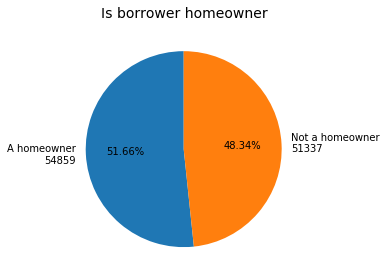

In [21]:
# Create a pie chart to show the proportion of homeowners out of all borrowers
homeowner = df['IsBorrowerHomeowner'].value_counts()
labels = f'A homeowner\n{homeowner.values[0]}', f'Not a homeowner\n{homeowner.values[1]}'
plt.pie(homeowner, labels=labels, startangle=90, counterclock=True, autopct='%.2f%%');
plt.axis('square');
plt.title('Is borrower homeowner\n', fontsize=14);

- Observation: Most of the borrowers are homeowners with a percentage of 51.66% out of all borrowers.

### Explore: Income Range

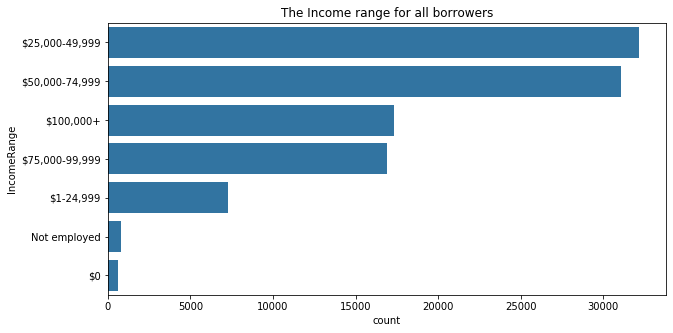

In [22]:
# Create a count plot to explore the counts for each income range
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
plt.title("The Income range for all borrowers")
sns.countplot(data = df, y = 'IncomeRange', color = base_color,
             order = df['IncomeRange'].value_counts().index );

- Observation: Most borrowers have income range from 25,000-49,999. The second most ranges from 50,000-74,999. The third range is above 100,000. However, there is not too much difference in the counts between the top two. 

### Explore: Loan Status

In [23]:
# Counts of unique loan status
df['LoanStatus'].value_counts()

Current                   56576
Completed                 33464
Chargedoff                10612
Defaulted                  3271
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

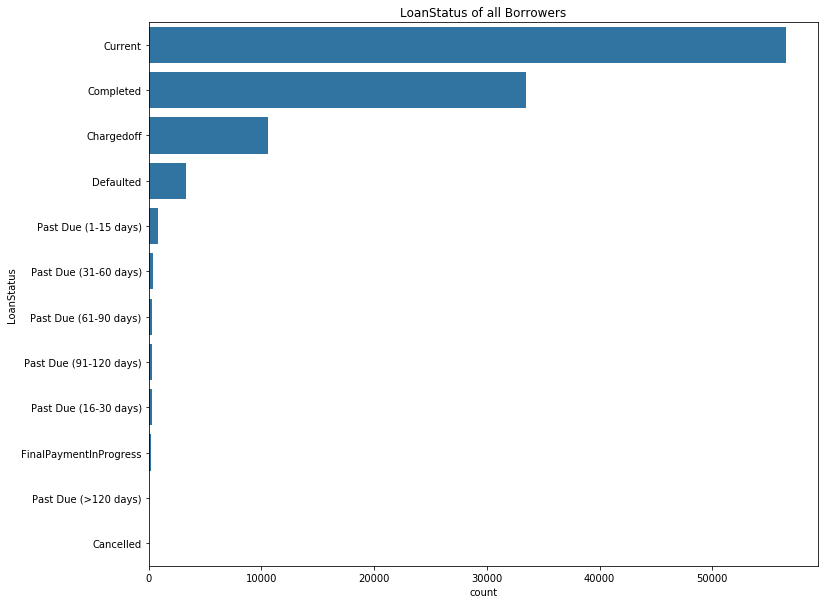

In [24]:
# Create a count plot to explore the counts for each 'LoanStatus'
plt.figure(figsize = [12, 10]) 
base_color = sns.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sns.countplot(data = df, y = 'LoanStatus', color = base_color,
             order = df['LoanStatus'].value_counts().index);


- Observation: Most of the loan status is listed as - current.

### Explore: Employment Status

In [25]:
#df_status = df[df.EmploymentStatus == 'Employed']
df_status = df.loc[:,['EmploymentStatus']]

In [26]:
# count the values of each unique employment status
df_status['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26259
Self-employed     6110
Other             3806
Part-time         1074
Not employed       831
Retired            794
Name: EmploymentStatus, dtype: int64

In [27]:
# create a Series with info of the counts of empoyment status
counts = [df_status['EmploymentStatus'].value_counts()]
# change the Series to a dataframe
counts = pd.DataFrame(counts)
counts

,Employed,Full-time,Self-employed,Other,Part-time,Not employed,Retired
EmploymentStatus,67322,26259,6110,3806,1074,831,794


C:\Users\jieha\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


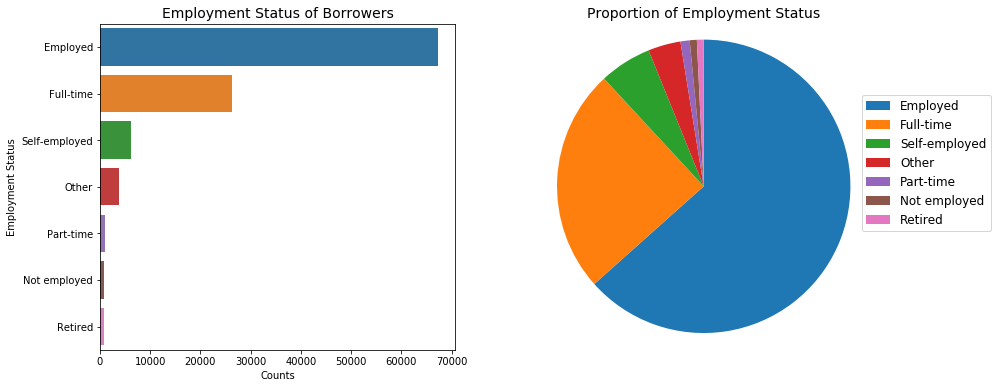

In [28]:
# Create a barplot and a pie chart to compare the proportion of each empoyment status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
counts = [counts[i] for i in ['Employed', 'Full-time', 'Self-employed', 'Other', 
       'Part-time', 'Not employed', 'Retired']]
sns.barplot(counts, ['Employed', 'Full-time', 'Self-employed', 'Other', 
       'Part-time', 'Not employed', 'Retired'])
plt.xlabel('Counts')
plt.ylabel('Employment Status')
plt.title('Employment Status of Borrowers', fontsize=14)

plt.subplot(1, 2, 2)
#labels = [f'{j}\n{counts[i]:.2f}min' for i, j in enumerate(['Employed', 'Full-time', 'Self-employed', 'Other', 'Part-time', 'Not employed', 'Retired'])]
labels = ['Employed', 'Full-time', 'Self-employed', 'Other', 
       'Part-time', 'Not employed', 'Retired']
#plt.pie(counts, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%');
pie = plt.pie(counts, startangle=90, counterclock=False);
plt.legend(pie[0], labels, bbox_to_anchor = (1.4,0.8), loc = 'upper right',fontsize=12)
plt.axis('square');
plt.title('Proportion of Employment Status', fontsize=14);

- Observation: Majority of the borrowers are employed.

### Explore: Occupation

In [29]:
# explore the unique occupations out of all borrowers
df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [30]:
# 'Other' occupation has the largest value, but it is not helpful 
# so 'other' occupataion is eliminated for this analysis
job = df[df['Occupation'] != 'Other']

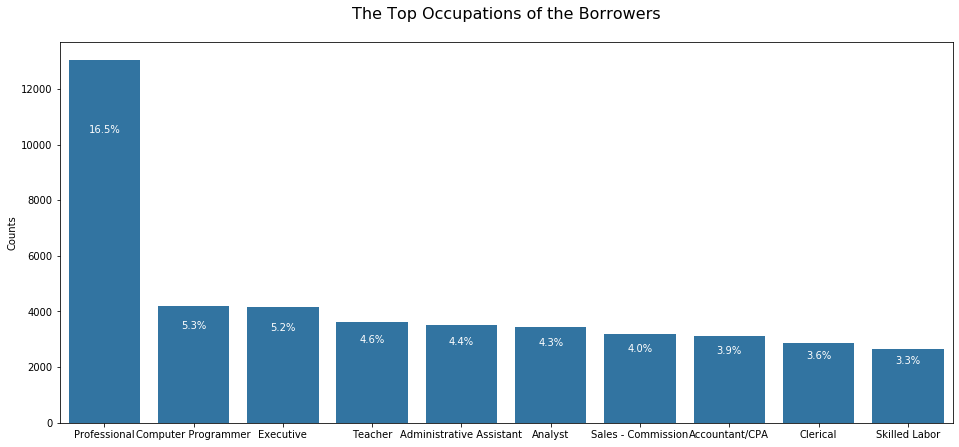

In [31]:
# Create a barplot to see the top 10 occupations
plt.figure(figsize=(16,7))
base_color = sns.color_palette()[0]
top = job['Occupation'].value_counts().head(10)
sns.barplot(top.index, top.values, color = base_color)# add annotations
n_points = job.shape[0]
gen_counts = job['Occupation'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 0.8*count, pct_string, ha = 'center', color = 'w')
plt.ylabel('Counts')
plt.title('The Top Occupations of the Borrowers\n', fontsize=16);

- Observation: *other* was not very helpful in exploring the data regarding the occupation, so it was eliminated. Therefore, the rest of the data showed the most popular occupation is professional as 16.5% were listed as professionals. 

### Explore: Geographical Information of the borrowers

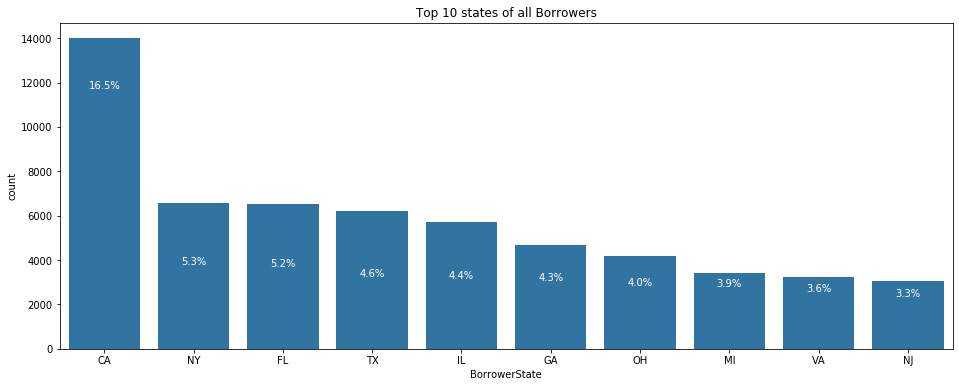

In [32]:
# Check the top 10 BorrowerState
plt.figure(figsize = [16,6]) 
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'BorrowerState', color = base_color,
             order = df['BorrowerState'].value_counts().head(10).index );

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 0.9*count, pct_string, ha = 'center', color = 'w')
plt.title("Top 10 states of all Borrowers");

- Observation: Most of the borrowers are from the state of California, followed by New York and Florida.

In [33]:
df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'AvailableBankcardCredit', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'OnTimeProsperPayments', 'LoanNumber', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Investors'],
      dtype='object')

In [34]:
# statistical information about the 'DebtToIncomeRatio'
df.DebtToIncomeRatio.describe()

count    97766.000000
mean         0.274304
std          0.509488
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

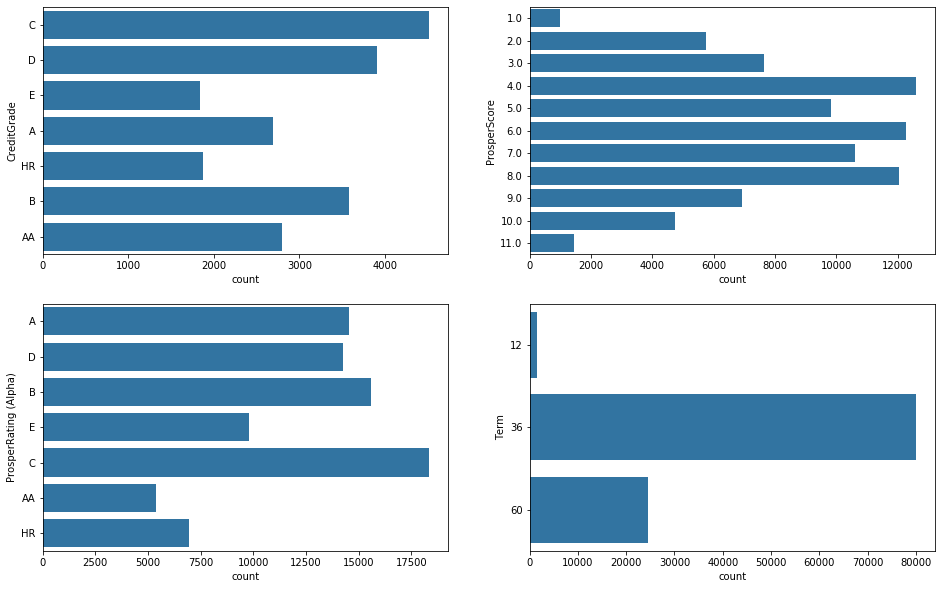

In [35]:
# Create countplots for 'CreditGrade','ProsperScore','ProsperRating (Alpha)','Term'

plt.figure(figsize=(16, 10))
base_color = sns.color_palette()[0]
n_points = df.shape[0]
for i, j in enumerate(['CreditGrade','ProsperScore','ProsperRating (Alpha)','Term']):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, y=j, color=base_color);


- The plots above showed the counts of borrowers regarding credit grade, prosper score, prosper rating and term.
- Most people have credit grade C.
- The top three prosper score are 4.0, 6.0, and 8.0. The highest score 11 do not have many counts, indicating fewer than 2000  people have the lowest risk. 
- Most prosper rating is rated as C. 
- The length of loan known as term is mostly for 36 months.

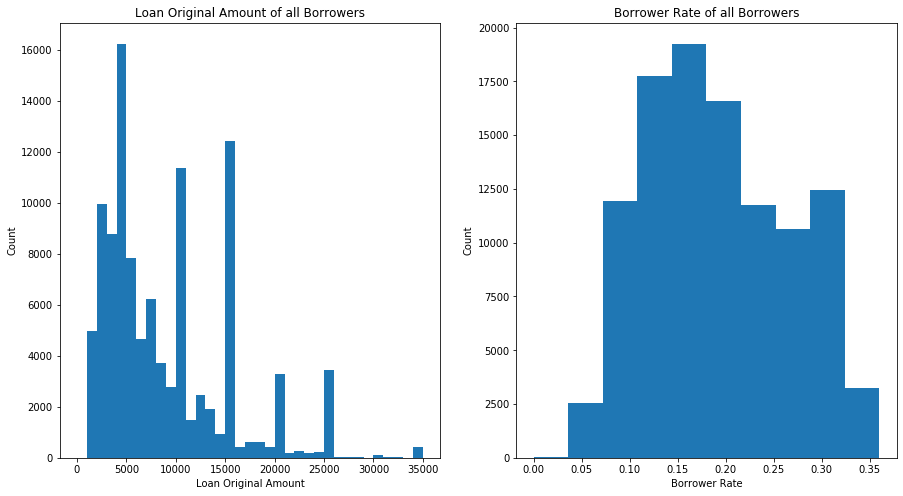

In [36]:
# Create histograms regarding the original loan amount and borrower rate
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers");

# right histogram: data plotted after direct log transformation

plt.subplot(1, 2, 2)
plt.hist(data =df, x = 'BorrowerRate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count');
plt.title("Borrower Rate of all Borrowers");

- Observation: The counts of borrowers are not normally distributed regarding the original amount of loan and borrow rate. The both skewed to the right. The loan amount for the majority is below 15000.

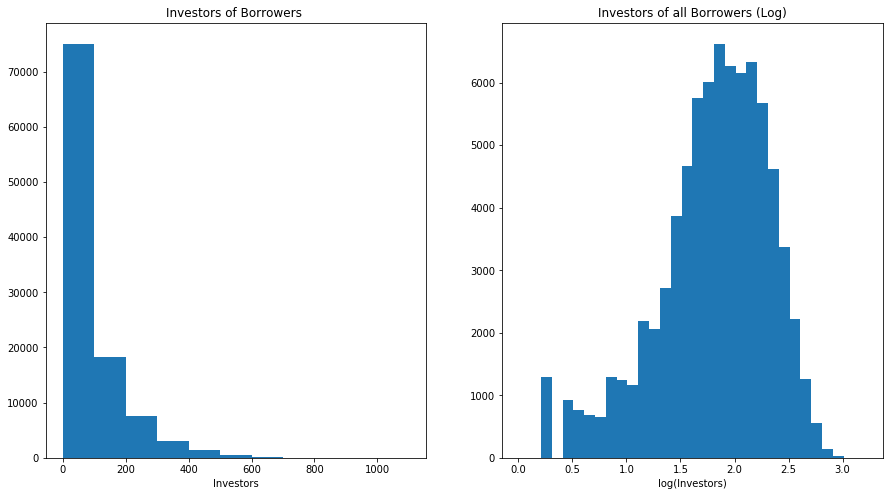

In [37]:
# Explore the distribution of the borrower counts with respect to the investors
plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['Investors'].max()+10, 100) # define the bin edges
plt.hist(data =df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of Borrowers ");

# log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df['Investors']) # direct data transform
log_bin_edges = np.arange(0.01, log_data.max()+0.2, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

- Observation: The count of borrowers with respect to the investors of borrowers skewed to the right. After changing the scale to the log scale,
    the distribution is close to normal.

# Bivariate 

In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

Created the dataframes for the most popular 4 occupations.

In [38]:
# 4 data frames for top 4 occupations
prof_df = df[df['Occupation'] == 'Professional']
comp_df = df[df['Occupation'] == 'Computer Programmer']
exec_df = df[df['Occupation'] == 'Executive']
teac_df = df[df['Occupation'] == 'Teacher']

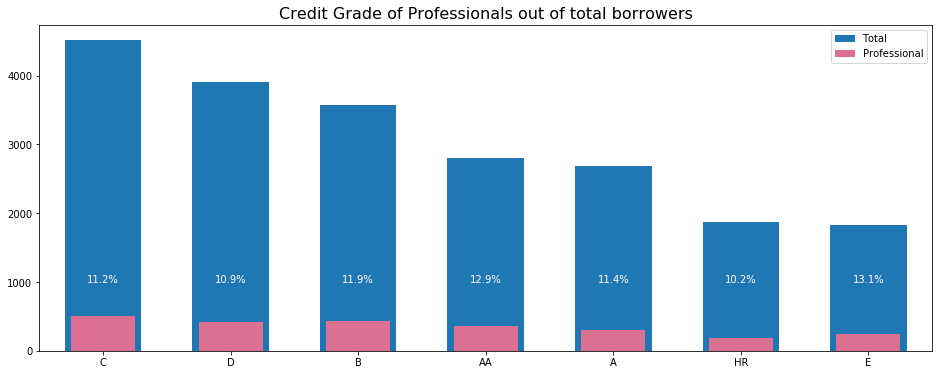

In [39]:
# Explore the proportion of professionals out of all borrowers for each credit grade
plt.figure(figsize=(16, 6))
counts = df['CreditGrade'].value_counts()
prof_counts = prof_df['CreditGrade'].value_counts()
counts.plot.bar(label='Total', width=.6)

prof_counts.reindex(counts.index).plot.bar(label='Professional', color='palevioletred')
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = counts[label.get_text()]
    prof_count = prof_counts[label.get_text()]
    pct_string = f'{100*prof_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 1000, pct_string, ha = 'center', color='w')
plt.legend()
plt.xticks(rotation=0)
plt.title('Credit Grade of Professionals out of total borrowers', fontsize=16);

- Observation: The most credit grade for all borrowers is C. Similarly, most professionals also have credit grade C, but the relative percentage for professional is highest for credit grade E. 

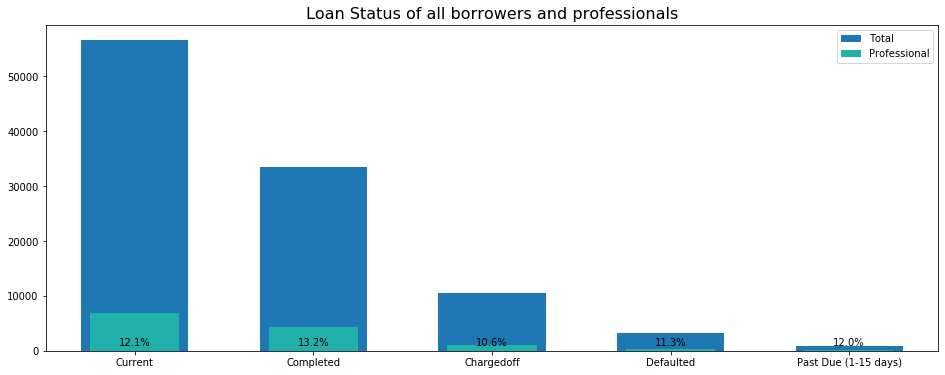

In [40]:
# Explore the proportion of professionals out of all borrowers for top 5 loan status
plt.figure(figsize=(16, 6))
counts = df['LoanStatus'].value_counts()[:5]
prof_counts = prof_df['LoanStatus'].value_counts()[:5]
counts.plot.bar(label='Total', width=.6)

prof_counts.reindex(counts.index).plot.bar(label='Professional', color='lightseagreen')

locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = counts[label.get_text()]
    prof_count = prof_counts[label.get_text()]
    pct_string = f'{100*prof_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 1000, pct_string, ha = 'center')
plt.legend()
plt.xticks(rotation=0)
plt.title('Loan Status of all borrowers and professionals', fontsize=16);

- Observation: Both professionals and all borrowers' loan status is *current*.

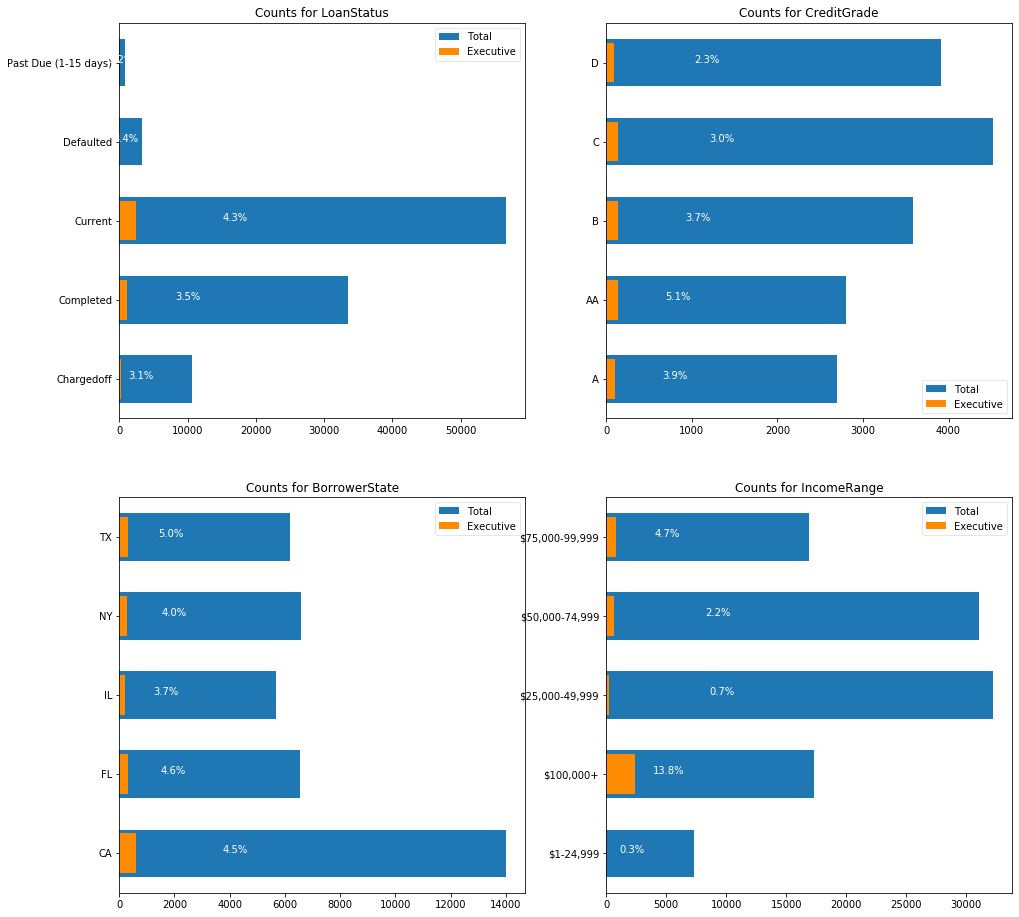

In [41]:
# the proportion of professionals out of all borrowers 
# counts of top 5 'LoanStatus', 'CreditGrade', 'BorrowerState', 'IncomeRange'
plt.figure(figsize=(16, 16))
base_color = sns.color_palette()[0]
n_points = df.shape[0]
for i, j in enumerate(['LoanStatus', 'CreditGrade', 'BorrowerState', 'IncomeRange']):
    plt.subplot(2, 2, i+1)

    # get counts of total and delayed flights
    counts = df[j].value_counts()[:5]
    exec_counts = exec_df[j].value_counts()[:5]

    # plot stacked bar charts (reindex or use barplot's order)
    counts.sort_index().plot.barh(label='Total', width=.6)
    exec_counts.sort_index().plot.barh(label='Executive', color='darkorange')

    locs, labels = plt.yticks() # get the current tick locations and labels
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = counts[label.get_text()]
        exec_count = exec_counts[label.get_text()]
        pct_string = f'{100*exec_count/count:0.1f}%'
        # print the annotation just below the top of the bar
        plt.text(0.30*count, loc, pct_string, ha = 'center', color = 'w')

    plt.legend(framealpha = 0.5, fancybox=True);
    plt.title(f'Counts for {j}');

- Observation: The trends of the professional and all borrowers for the top 5 variables (for loan status, credit grade, borrow state and income range) are very similar except for the income range, where most professionals' income range is above 100,000.

In [42]:
df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'AvailableBankcardCredit', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'OnTimeProsperPayments', 'LoanNumber', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Investors'],
      dtype='object')

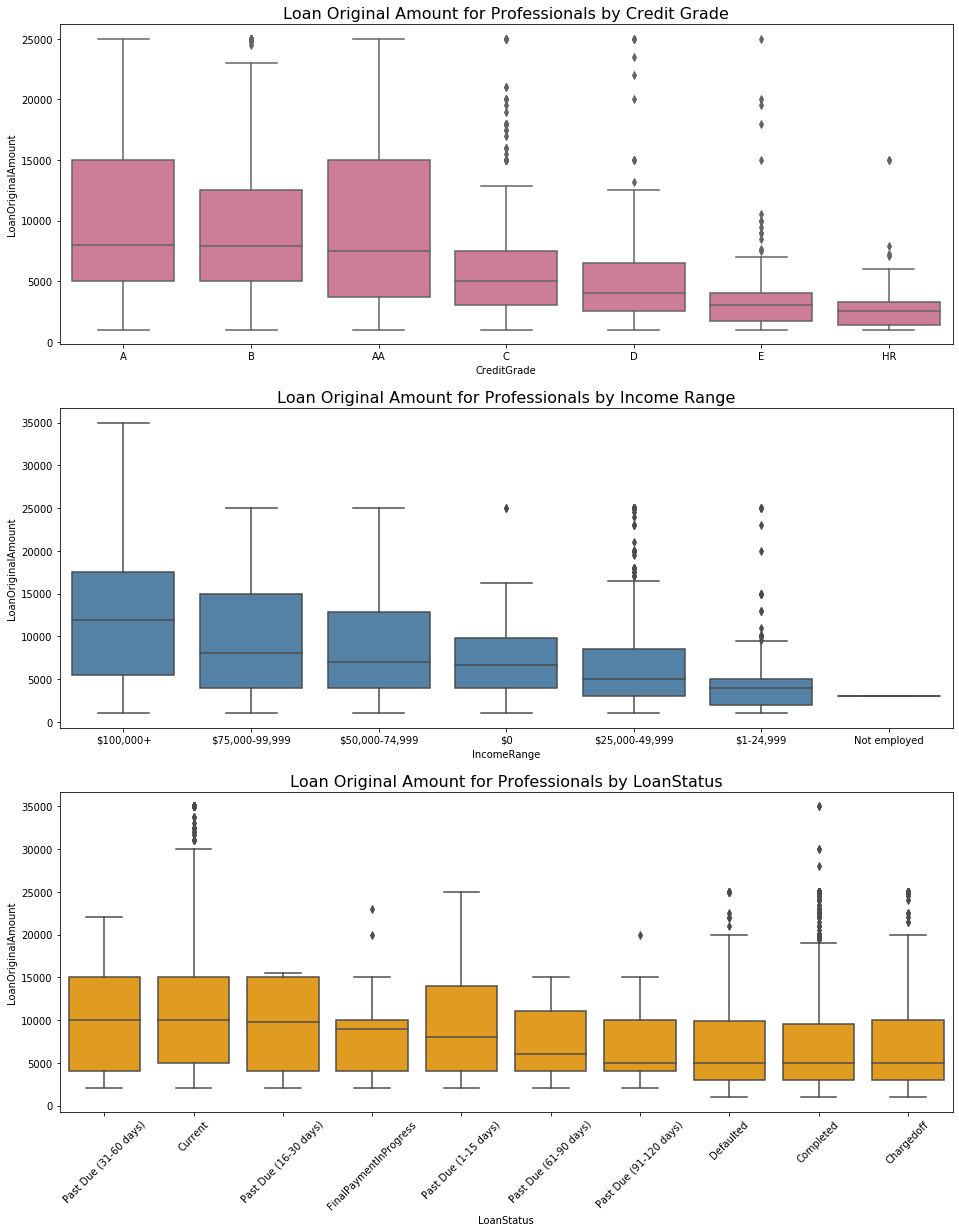

In [43]:
# use boxplot to explore the statistics and outliers of 'LoanOriginalAmount'
# with respect to 'CreditGrade','IncomeRange',and 'LoanStatus' for all professional
plt.figure(figsize= (16,20))

plt.subplot(3,1,1)
order = prof_df.groupby('CreditGrade')['LoanOriginalAmount'].median().sort_values(ascending=False).index
sns.boxplot(data=prof_df, x='CreditGrade', y=prof_df['LoanOriginalAmount'], order=order, color = 'palevioletred');
plt.title('Loan Original Amount for Professionals by Credit Grade', fontsize=16);

plt.subplot(3,1,2)
order = prof_df.groupby('IncomeRange')['LoanOriginalAmount'].median().sort_values(ascending=False).index
sns.boxplot(data=prof_df, x='IncomeRange', y=prof_df['LoanOriginalAmount'], order=order, color = 'steelblue');
plt.title('Loan Original Amount for Professionals by Income Range', fontsize=16);

plt.subplot(3,1,3)
order = prof_df.groupby('LoanStatus')['LoanOriginalAmount'].median().sort_values(ascending=False).index
sns.boxplot(data=prof_df, x='LoanStatus', y=prof_df['LoanOriginalAmount'], order=order, color = 'orange');
plt.xticks(rotation = 45)
plt.title('Loan Original Amount for Professionals by LoanStatus', fontsize=16);

The plots demonstrate the distributions of original loan amount with respect to credit grade, income range, and loan status for professionals only. 

- Observation 1: Overall, credit grades AA,A,and B for all professionals have very similar amount of loan.
- Observation 2: The average amount of loan is correlated with the income range for the top 3 income range only.

Text(0.5, 1.0, 'Executive: Credit Grade vs Loan Amount')

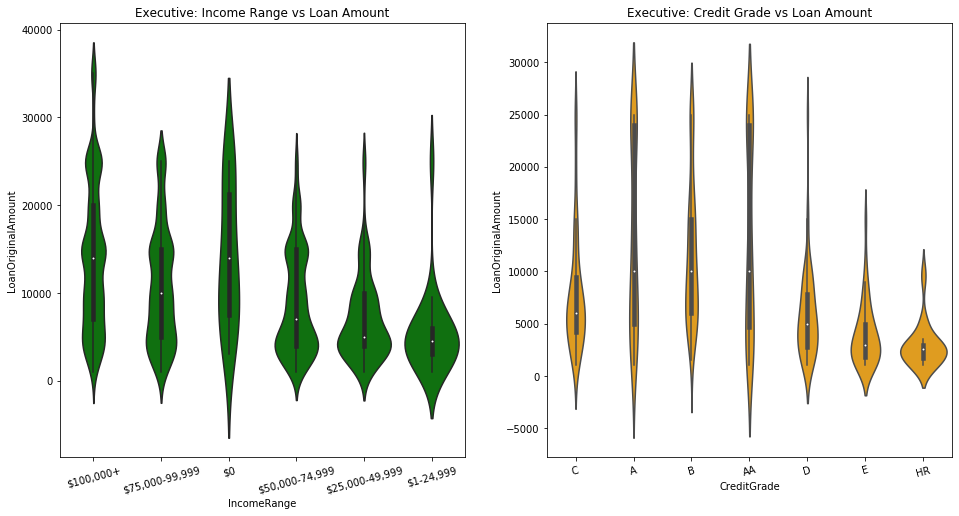

In [44]:
# use violin plots to explore the statistics of 'LoanOriginalAmount'
# with respect to 'IncomeRange' and 'CreditGrade' for all excutives
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
ax1 = sns.violinplot(data = exec_df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'green')
plt.xticks(rotation = 15);
plt.title('Executive: Income Range vs Loan Amount')

plt.subplot(1,2,2)
ax2 = sns.violinplot(data = exec_df, x = 'CreditGrade', y = 'LoanOriginalAmount', color = 'orange')
plt.xticks(rotation = 15);
plt.title('Executive: Credit Grade vs Loan Amount')

- Observation: most of the ranges of the original loan amount with respect to income range and credit grade are widely spreaded for the excutives. 

Text(0.5, 1.0, 'Count of Teachers')

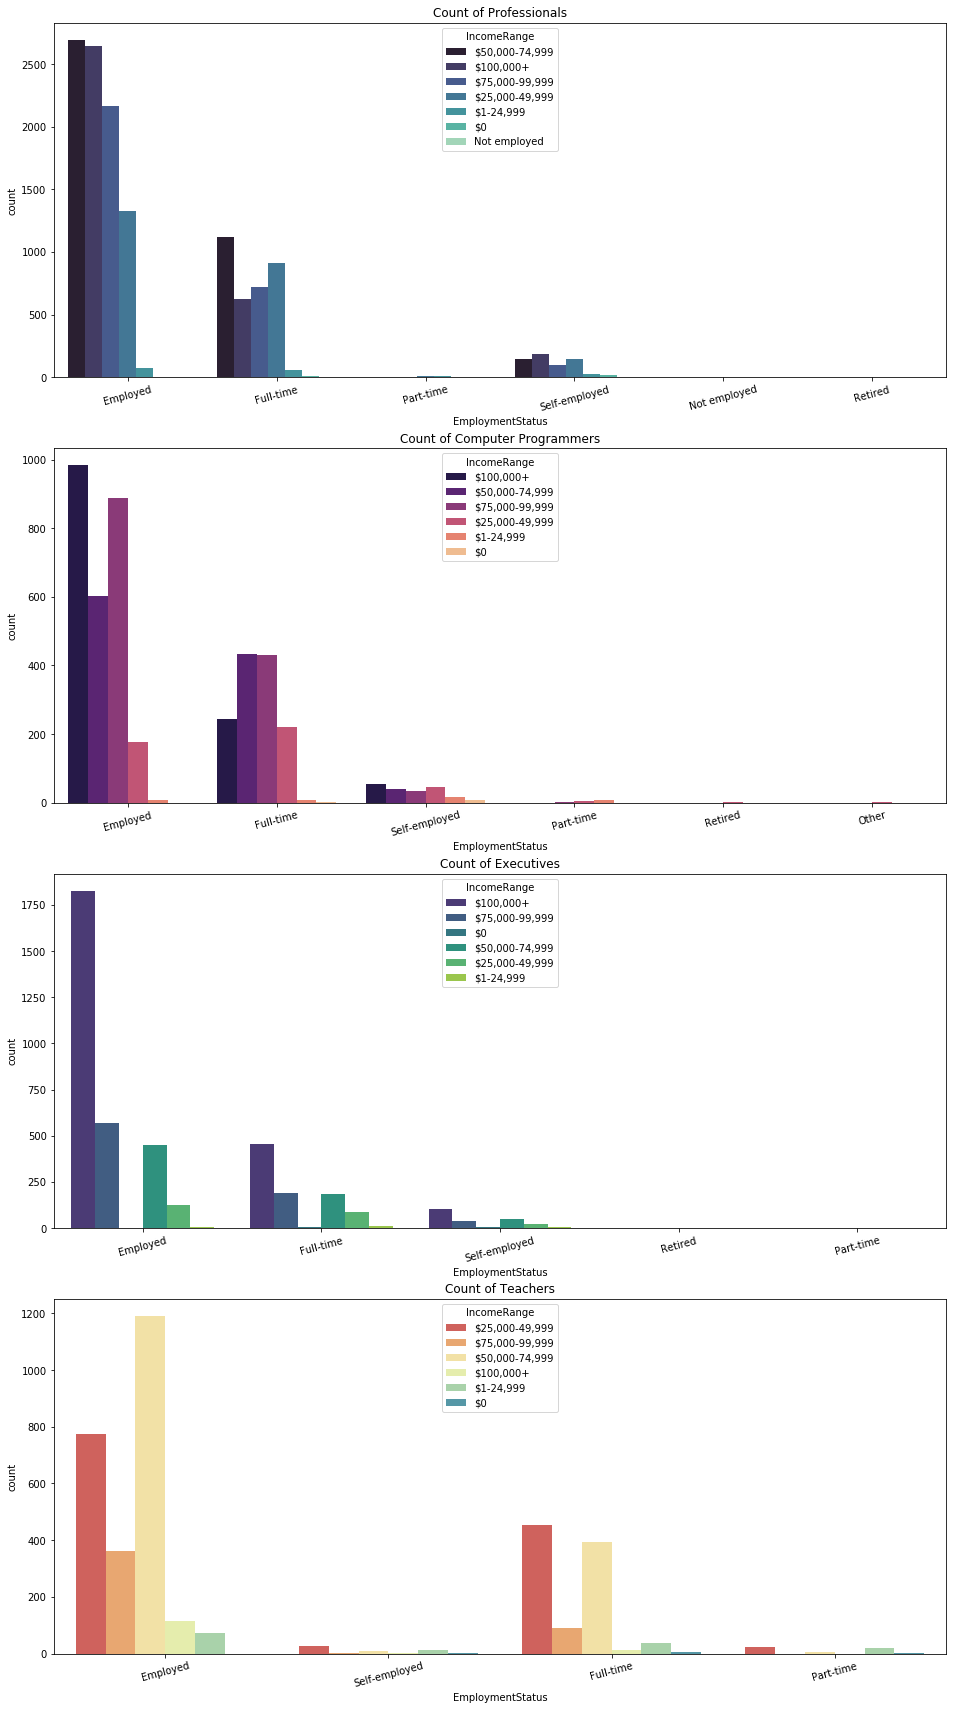

In [45]:
# Explore for the top 4 occupataions the count for each income range regarding different empoyment status
plt.figure(figsize = [16, 30])

plt.subplot(4,1,1)
sns.countplot(data = prof_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'mako')
plt.xticks(rotation = 15)
plt.title('Count of Professionals')

plt.subplot(4,1,2)
sns.countplot(data = comp_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'magma')
plt.xticks(rotation = 15)
plt.title('Count of Computer Programmers')

plt.subplot(4,1,3)
sns.countplot(data = exec_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'viridis')
plt.xticks(rotation = 15)
plt.title('Count of Executives')

plt.subplot(4,1,4)
sns.countplot(data = teac_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Spectral')
plt.xticks(rotation = 15)
plt.title('Count of Teachers')


- Observation: Most borrowers are employed. This is consistent for top 4 occupations. Out of all the employed people, the largest group who make more than 100,000 are executives. 

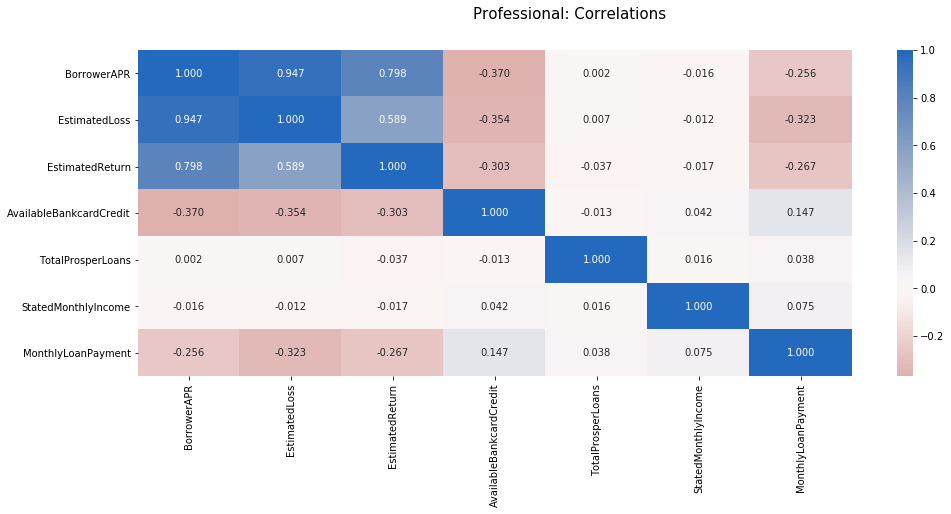

In [47]:
# Explore the correlations among 'CreditGrade', 'BorrowerAPR', 'EstimatedLoss', 
#                     'EstimatedReturn', 'AvailableBankcardCredit', 
#                     'IncomeRange', 'TotalProsperLoans', 'StatedMonthlyIncome', 
#                     'MonthlyLoanPayment'
plt.figure(figsize=(16, 6))
sns.heatmap(prof_df[['CreditGrade', 'BorrowerAPR', 'EstimatedLoss', 
                     'EstimatedReturn', 'AvailableBankcardCredit', 
                     'IncomeRange', 'TotalProsperLoans', 'StatedMonthlyIncome', 
                     'MonthlyLoanPayment']].corr(), 
                     annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.suptitle('Professional: Correlations', size=15);

###### Observation: for all the professionals, 
- Positive correlations:     
     BorrowerAPR and Estimated Loss (strong)     
     BorrowerAPR and Estimated Return (Strong)     
     Estimated Loss and Estimated Return (moderate)     


- Negative correlations:     
AvailableBankcardCredit and BorrowerAPR (weak)     
AvailableBankcardCredit and Estimated Loss (weak)     
AvailableBankcardCredit and Estimated Return (weak)     
Monthely Loan Payment and BorrowerAPR (weak)     
Monthely Loan Payment and Estimated Loss (weak)     
Monthely Loan Payment and Estimated Return (weak)     

# Multivariate Exploration

In [48]:
#Top 36 occupations
work_top = df['Occupation'].value_counts().head(36)
work_top = pd.DataFrame(work_top)
prof_df.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,...,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,Investors
1,NaN,36,Current,0.12016,0.0920,0.0249,0.05470,6.0,A,7.0,...,10266.0,0.18,"$50,000-74,999",6125.000000,NaN,NaN,134815,10000,318.93,1
5,NaN,60,Current,0.15425,0.1314,0.0449,0.07077,5.0,B,10.0,...,86509.0,0.36,"$100,000+",8333.333333,NaN,NaN,123257,15000,342.37,1
16,NaN,60,Current,0.30748,0.2809,0.1225,0.12480,2.0,E,4.0,...,27.0,0.15,"$75,000-99,999",8291.666667,3.0,67.0,95921,4000,124.76,8
21,D,36,Completed,0.21488,0.2075,NaN,NaN,NaN,NaN,NaN,...,1366.0,0.09,"$25,000-49,999",3750.000000,NaN,NaN,23565,3000,112.64,53
36,NaN,36,Current,0.32446,0.2850,0.1475,0.10256,2.0,E,2.0,...,31444.0,0.14,"$100,000+",8750.000000,NaN,NaN,121285,10000,416.34,3


In [49]:
# Top 95 percentile of the stated monthly income to be used for the x axis limit
np.percentile(df.StatedMonthlyIncome, 95)

12333.333333

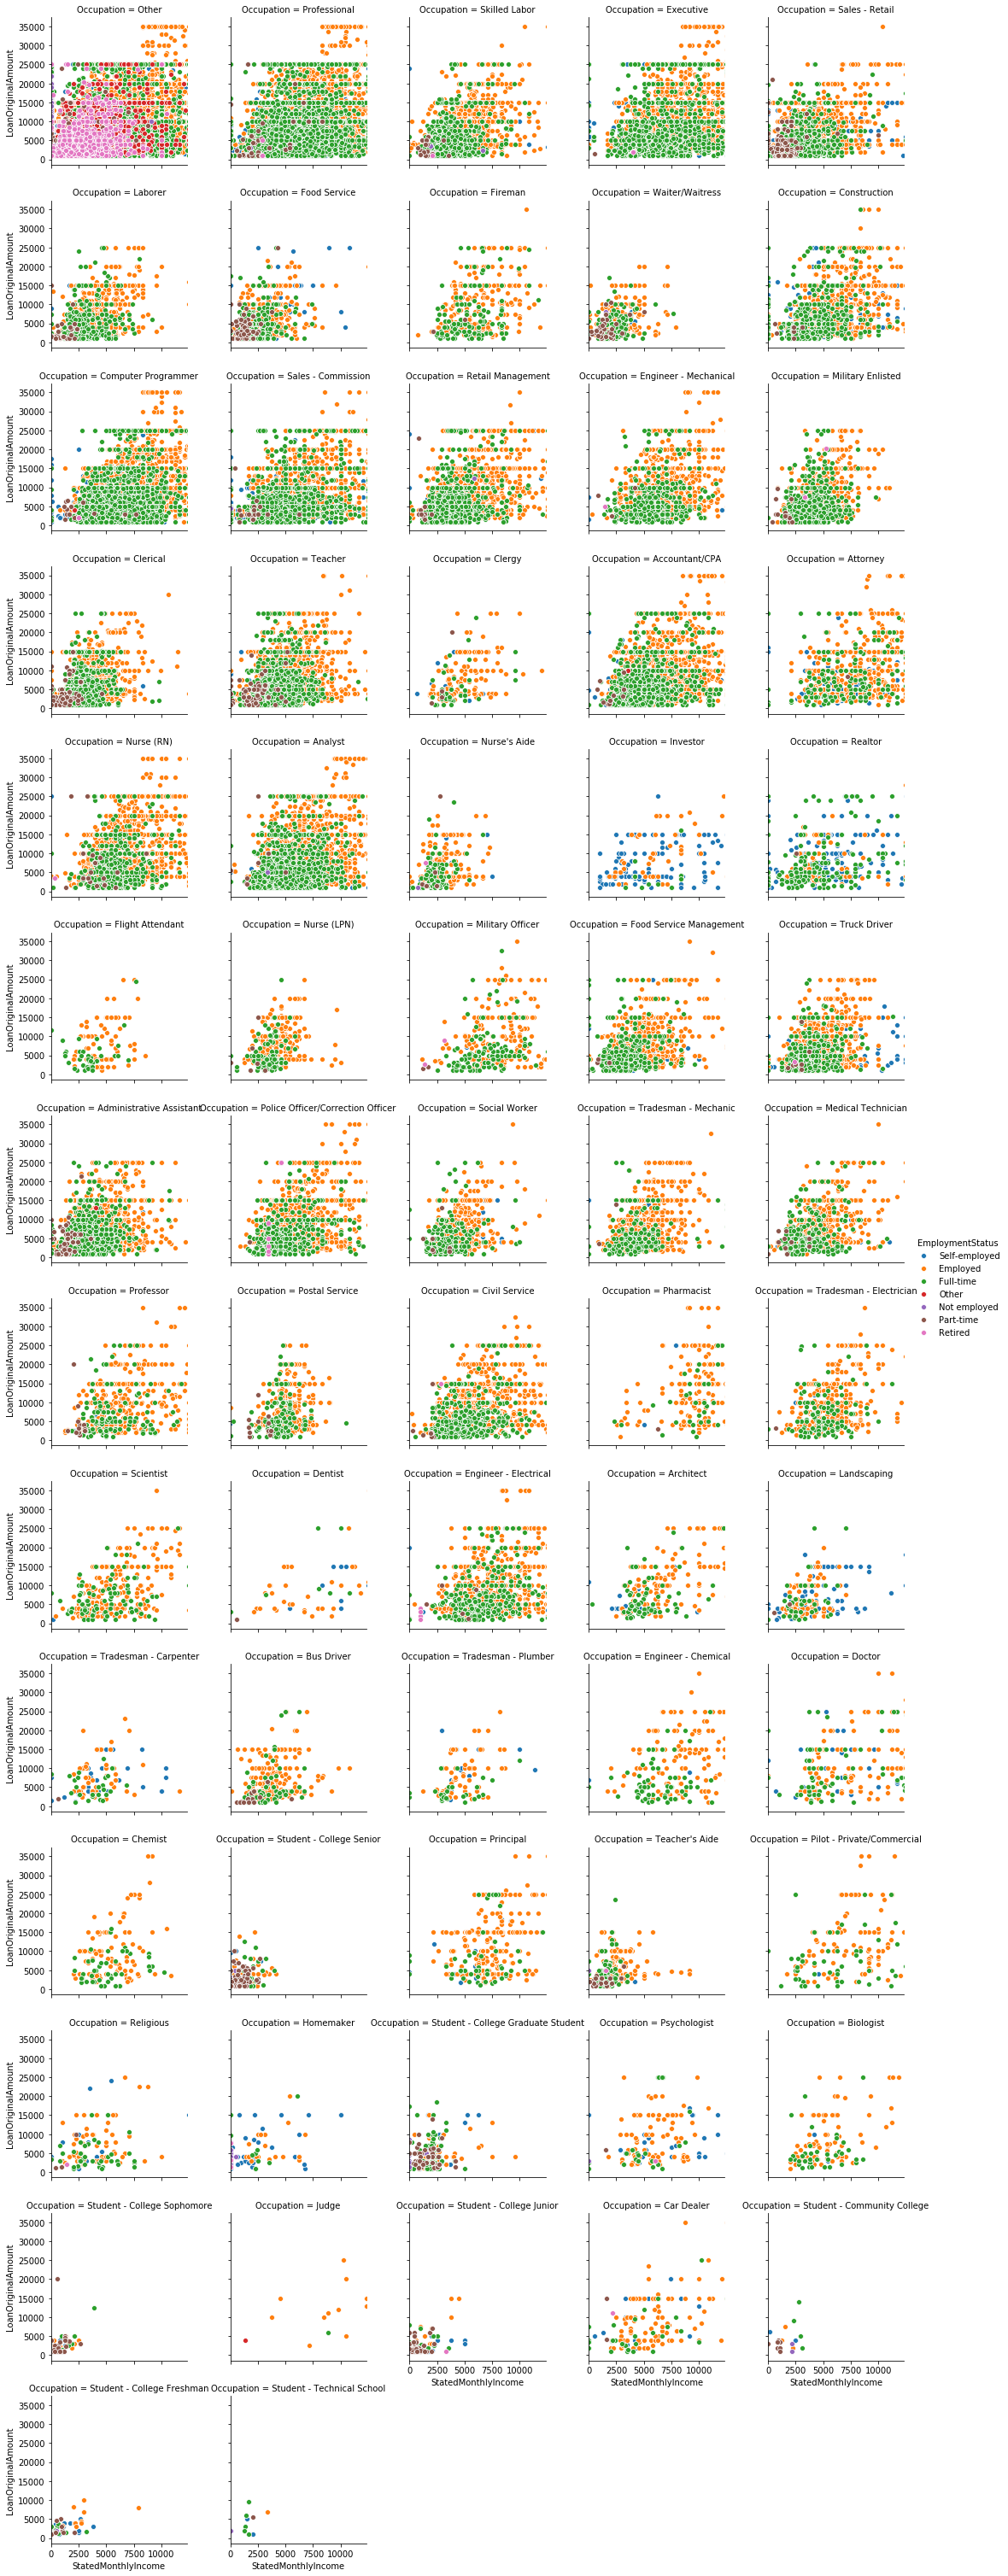

In [50]:
# Use scatterplot to explore the distribution of original loan amount vs monthly payment
# with respect to empoyment status for each occupation 
g = sns.FacetGrid(data = df, col = 'Occupation', col_wrap = 5, hue = 'EmploymentStatus')
g.set(xlim = (0, 12334))
g.map(sns.scatterplot, 'StatedMonthlyIncome','LoanOriginalAmount').add_legend()

    
#plt.title('Origianl Loan Amount by Monthly Income of Different Emploment Status For Each Occopation')

- Observation: Employed people may include some full-time job borrowers. However, from all the graphs, the employed borrwers cover more higher monthly income as well as higher origianl loan amount, suggesting that borrowers with high income and high loan are actually not people who are not employed full-time. Yet, the part-time job people do show the lower income and lower loan amount. It is important to differentiate or clarify the category *employed*,  *full-time* and *part-time*. They may be not equivalent categories due to some overlapping, which may deliver the inaccurate or wrong information to the analysis and result.

Text(0.5, 1, 'Total Proper Loans by Debt/Income of Professionals')

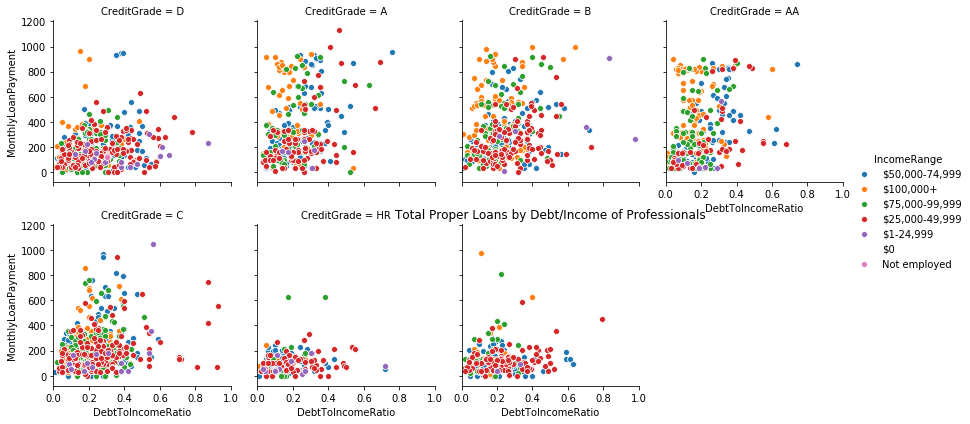

In [51]:
# Use scatter plots to viasualize the relationship between monthly payment and debt/income ratio
# for all professionals with different income ranges
g = sns.FacetGrid(data = prof_df, col = 'CreditGrade', col_wrap = 4, hue = 'IncomeRange')
g.set(xlim = (0, 1))
g.map(sns.scatterplot, 'DebtToIncomeRatio','MonthlyLoanPayment').add_legend()

plt.title('Total Proper Loans by Debt/Income of Professionals')

- Observation: For credit grades AA, A, B, C, and D, people with income range of 25,000-49,999 have relatively lower monthly loan payment comparing with people who have higher incomes even though the distribution of the debt to income ratio are not much different comparing among these groups.

In [52]:
df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'AvailableBankcardCredit', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'OnTimeProsperPayments', 'LoanNumber', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Investors'],
      dtype='object')

#### Does loan status depend on the original loan amount and income range for different occupations?

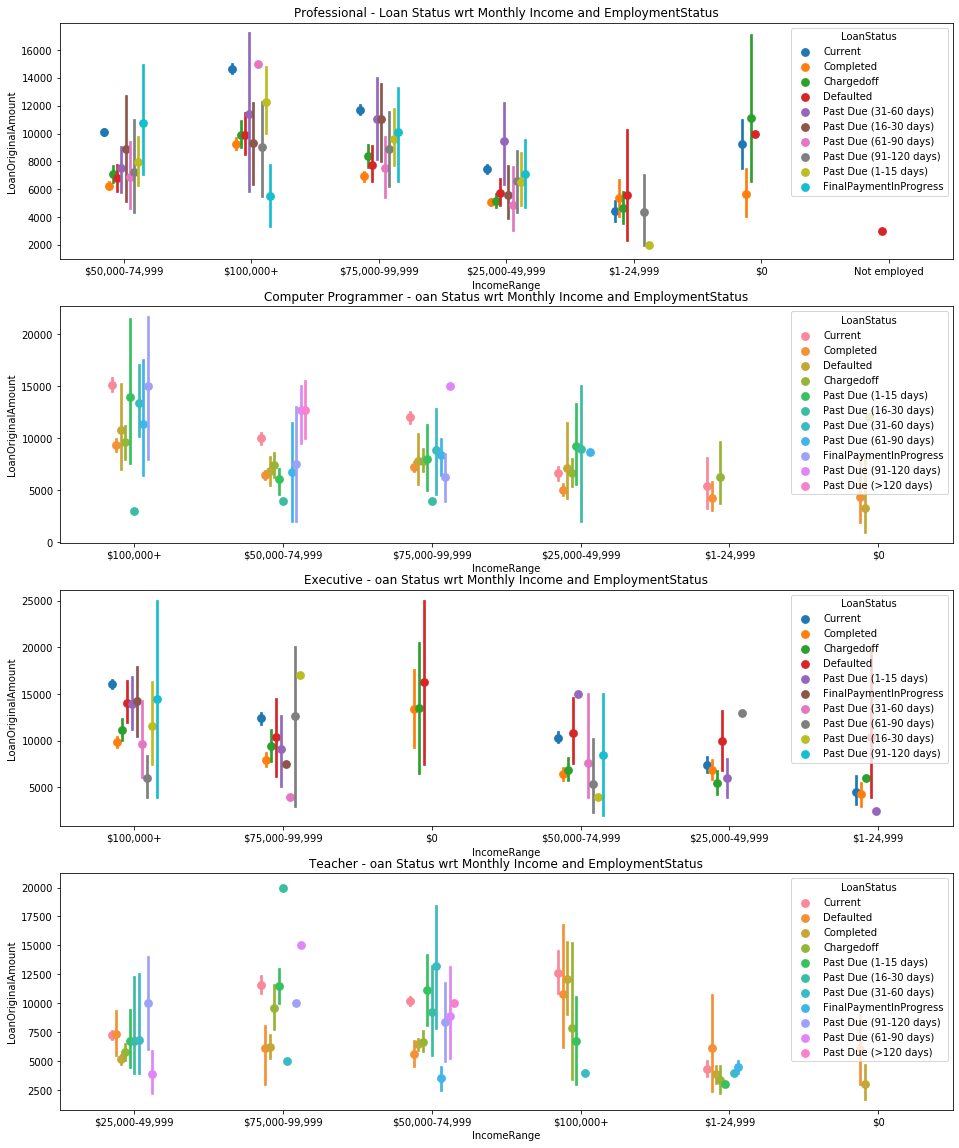

In [53]:
# create point plots for top 4 occupations
# explore the information about the original loan amount withrespect to income range for different loan status 
plt.figure(figsize = [16,20])
plt.subplot(4,1,1)
ax = sns.pointplot(data = prof_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
plt.title('Professional - Loan Status wrt Monthly Income and EmploymentStatus');

plt.subplot(4,1,2)
ax = sns.pointplot(data = comp_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
plt.title('Computer Programmer - oan Status wrt Monthly Income and EmploymentStatus');

plt.subplot(4,1,3)
ax = sns.pointplot(data = exec_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
plt.title('Executive - oan Status wrt Monthly Income and EmploymentStatus');

plt.subplot(4,1,4)
ax = sns.pointplot(data = teac_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
plt.title('Teacher - oan Status wrt Monthly Income and EmploymentStatus');

For highest paid professionals (100,000+), the final payment are in progress for those who have the lowest original loan amount. Yet for professional whose income range in (50,000-74,999), the final payment in progress haev the highest average original loan amount.    
For highest paid computer programmers (100,000+), most of them have higher original loan amounts despite the loan status except for one group that passed the due for about 1 month.

#### Does prosper rating depend on the original loan amount and income range for professionals?

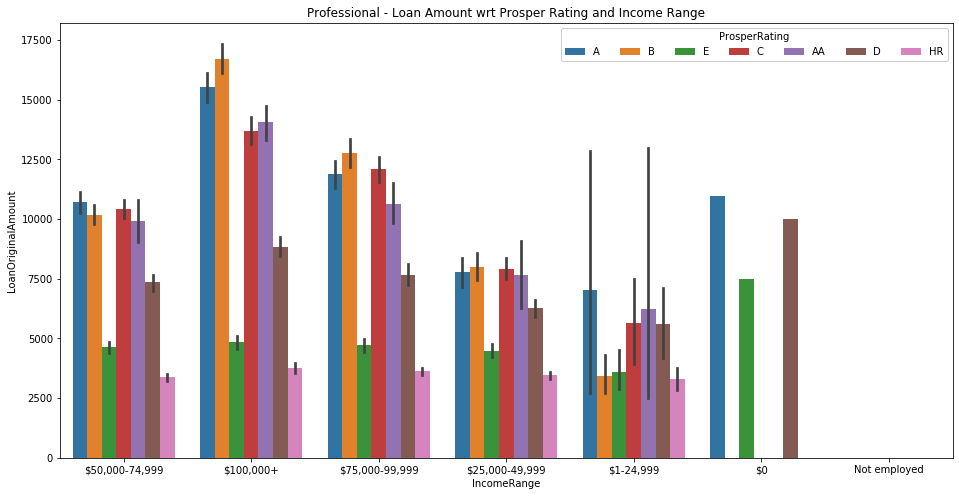

In [55]:
# Explore the relationship between loan amount for different proper rating of each income range of all professional
plt.figure(figsize = [16, 8])

ax = sns.barplot(data = prof_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 1, ncol = 7, framealpha = 1, title = 'ProsperRating')
plt.title('Professional - Loan Amount wrt Prosper Rating and Income Range');

- Observation: for all the professionals, the highest original loan amount is borrowed by those who have highest 
income with a proper rating of B. Also The average loan amount for professionals with prosper rating B is highest for all income range group except for 50,000-74,999.